In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
def display(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [6]:
img1 = cv2.imread(r"C:\Work\Programing Language\Python\Libraries\OpenCV\data\img_8.png",0)
img1.shape

(1000, 657)

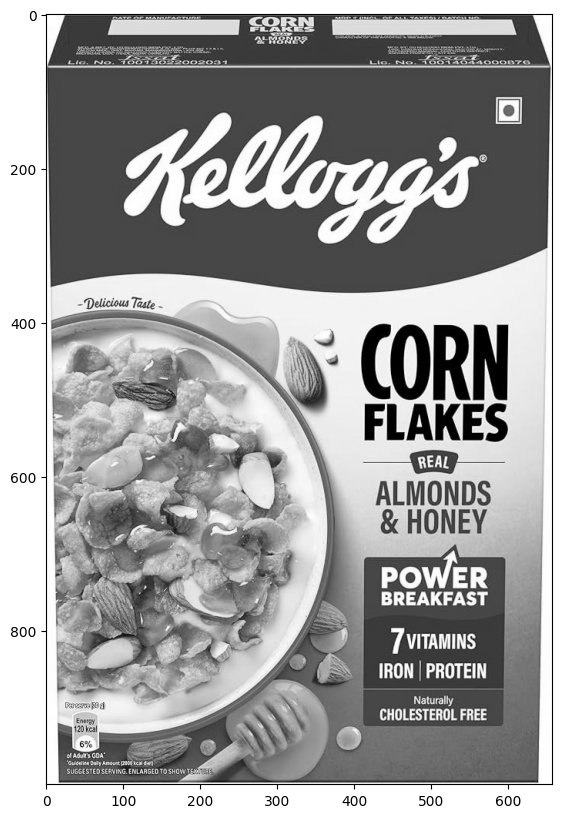

In [7]:
display(img1)
# plt.imshow(img1)

In [11]:
img2 = cv2.imread(r"C:\Work\Programing Language\Python\Libraries\OpenCV\data\img_9.png",cv2.IMREAD_GRAYSCALE)
img2.shape

(500, 750)

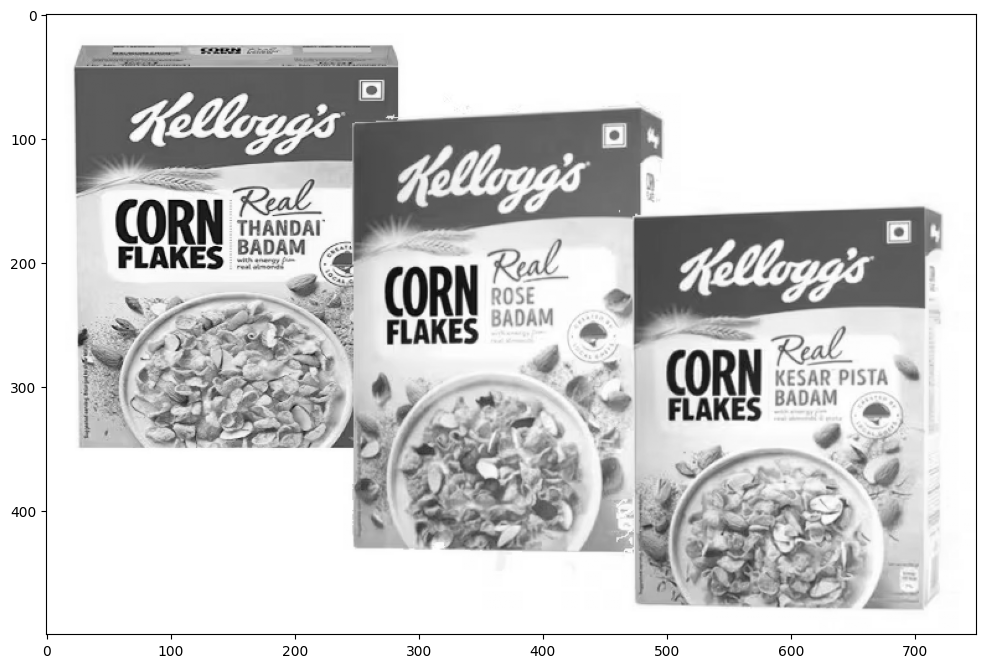

In [12]:
display(img2)

## BRUTE FORCE METHOD FOR ORB DESCRIPTORS

In [13]:
orb= cv2.ORB_create()

In [16]:
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)



* `kp` = KEY POINTS
* `DES` = DESCRIPTIONS

In [17]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [27]:
matches = bf.match(des1,des2)
len(matches)

153

In [30]:
# sort matches based on distance
matches = sorted(matches,key= lambda  x:x.distance)
img1_matches = cv2.drawMatches(img1,kp1,img2,kp2,matches[0:101],None,flags=2)

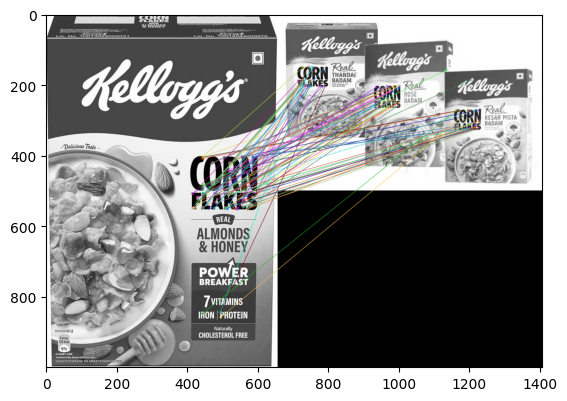

In [31]:
plt.imshow(img1_matches)